# 5.1 Ejemplo 1. Cálculo de energía total para átomo de hidrógeno. *Single Point Calculation*

En este segmento se realizarán una serie de cálculos simples con celdas pequeñas con la idea de obtener los parámetros de convergencia de los sistemas y realizar análisis de estos. Específicamente utilizaremos una celda con un solo átomo de hidrógeno.

## I. cálculo *"self consistend field"(scf)*

En QE, utilizar la opción "*scf*" en *calculation*, permite obtener la Energía Total de un sistema y los archivos de salida con las funciones de onda que pueden visualizarse - *e. g.* en **[XCrysDen](http://www.xcrysden.org/)**-. Al incluir algunos comandos o indicaciones en el archivo de entrada, también es posible obtener otras cantidades o propiedades como la presión en la celda, la fuerza en los iones, etc.

### Archivo de entrada, *Input file*: "name.in"

Un ejemplo de archivo de entrada para cálculos es [*H_example.in*](H_example.in), que podemos leer directamente en este notebook con *more* o *less* antecedido de "%" -para indicar que usamos uno de los comandos mágicos de Python- (*la lista completa de comandos se obtiene con: % lsmagic*):

In [3]:
%more H_example.in 

In [4]:
% lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

### Archivo muestra:

Los archivos de entrada están divididos en secciones, *e. g.*: control, system, electrons, ions, ATOMIC_SPECIES, K_POINTS, como se aprecia en el ejemplo H_example.in:

<img src="./Figs/PSH_example.in.png" style="width: 600px">

La descripción básica para el uso de todas las *keywords* se encuentran en el sitio web de QE: [Documentación: Input-Output](https://www.quantum-espresso.org/Doc/INPUT_PW.html).

Para realizar el cálculo con procesadores en paralelo con QE del *input* anterior, se puede usar la siguiente línea, antecedida por "!", - lo que permite "enviar" el comando a la terminal-. Aquí, como ejemplo se especifican 2 procesadores mediante *mpirun*, el ejecutable *pw.x* y los nombre nombre.*in* y nombre.*out*:

In [2]:
!mpirun --np 2 /qe-6.3/bin/pw.x < H_example.in > H_example.out

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


La instrucción anterior también podría utilizarse (sin el "!"), directamente en la terminal, ubicados en el directorio en donde se encuentre H_example.in.

Para leer el archivo de salida nombre*.out* podemos utilizar el siguiente comando, que abrirá una subventana del navegador:

In [3]:
%more H_example.out

También se puede accesar al archivo en formato de [texto](H_example.out), a una versión [pdf](/Docs/H_example.out.pdf) del archivo, o bien, utilizando la terminal o instrucciones como la siguiente:

Buscar información específica como la energía total del sistema utilizando el muy útil comando "*grep*":

In [5]:
!grep "!    total energy " H_example.out 

!    total energy              =      -0.95374481 Ry


## II. Análisis de convergencia de la energía de corte *(ecutwfc)*

El parámetro energía de corte (*ecutwfc*), junto con el parámetro *k-points* determinan el número de ondas planas utilizadas para expandir las funciones de onda $\psi_{n,\vec{k}}(\vec{r})$. 

En la eq. de Bloch: 

$\psi_{n,\vec{k}}(\vec{r})= \sum_{G}c_{n,\vec{k}}(\vec{G})e^{i(\vec{k}+\vec{G})\vec{r}}$...(1)




$n$ es la banda ("nivel energético") y $\vec{k}$ el vector de onda. $c$ son coeficientes que tienen la misma periodicidad que la supercelda del cristal  de la periodicidad $\vec{G}$ 

Para el análisis de la convergencia, por lo tanto se requiere hacer varios cálculos únicamente variando la *ecutwfc* y el número de *k-points* utilizados. Así para el caso del átomo de hidrógeno, se comienza la convergencia variando *ecutwfc*, asignando valores desde 1020 Ry hasta 80 Ry. 

In [29]:
import os                   # importamos librería OS de python para interactura con sistema operativo
import shutil               # i un high level file operator (copiar archivos en terminal) 
import fileinput            # i para importar y leer archivos

folder = 'HECutConvTest'    #¡nombre del directorio que vamos a crear
os.makedirs(folder)         #crear con mkdir el directorio "folder" donde se hara el test de convergencia 

i_file_name=input("Nombre del archivo base = ")    #nombre del archivo base
series_file_name=input("Nombre de la serie = ")    #nombre de la serie de archivos
prefix="H" #¡este prefijo hay que revisarlo!

shutil.copy2('scf/H_example.in', folder+'/'+i_file_name+".in") # complete target filename given
shutil.copy2(folder+'/'+i_file_name+".in", folder+'/'+series_file_name+".in") # complete target filename given

#La siguiente es una función que reemplaza prefijo y ecutwfc y crea un archivo llamado prefijo.in
def replace_values(filenamef,prefixf,ecutwfcf):
    f = open('HECutConvTest/'+filenamef+'.in' ,'r')  #abri archivo y lo lee  "read"
    filedata = f.read() 
    f.close()
    
    str_prefix="prefix='H'"         #¡Revisar valor 
    str_ecutwfc="ecutwfc = 50.0"   #¡Revisar valor
    
    new_prefix='prefix='+"'"+prefixf+str(ecutwfcf)+"'"
    new_ecutwfc="ecutwfc = "+str(ecutwfcf)+'.0'
    
    newdata = filedata.replace(str_prefix,new_prefix)  #reemplaza un texto con otro
    newdata2 = newdata.replace(str_ecutwfc,new_ecutwfc)
    
    g = open('HECutConvTest/'+prefixf+str(ecutwfcf)+'.in','+w')  # abre, si no existe crea y escribe newdata en archivo nuevo
    g.write(newdata2)
    g.close()
    
i_ecut = 20
f_ecut = 80
ecutwfc = i_ecut

while ecutwfc<=f_ecut:
    replace_values(series_file_name,series_file_name,ecutwfc)
    ecutwfc += 5

Nombre del archivo base = H_base
Nombre de la serie = H_Ener_Conv_Test_


Estando todos los archivos listos para hacer la prueba de convergencia de Ecutwfc, podemos correr manualmente cada input y posteriormente utilizar la siguiente rutina para recopilar la energía final de cada sistema y graficar Energía final vs. Ecutwfc. 

$\textbf{Ejercicio 1:}$ automatizar la ejecución de *pw.x* para que realice el cálculo en todos los archivos creados.

In [50]:
!mpirun --np 2 /qe-6.3/bin/pw.x < HECutConvTest/H_Ener_Conv_Test_80.in > HECutConvTest/H_Ener_Conv_Test_80.out

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Usando *grep* podemos ver el valor de la energía total de cada sistema -*ecutwfc*-:

In [7]:
!grep "!    total energy " HECutConvTest/*.out 

HECutConvTest/H_Ener_Conv_Test_20.out:!    total energy              =      -0.94804926 Ry
HECutConvTest/H_Ener_Conv_Test_25.out:!    total energy              =      -0.95130748 Ry
HECutConvTest/H_Ener_Conv_Test_30.out:!    total energy              =      -0.95267492 Ry
HECutConvTest/H_Ener_Conv_Test_35.out:!    total energy              =      -0.95317939 Ry
HECutConvTest/H_Ener_Conv_Test_40.out:!    total energy              =      -0.95355128 Ry
HECutConvTest/H_Ener_Conv_Test_45.out:!    total energy              =      -0.95368035 Ry
HECutConvTest/H_Ener_Conv_Test_50.out:!    total energy              =      -0.95374481 Ry
HECutConvTest/H_Ener_Conv_Test_55.out:!    total energy              =      -0.95376561 Ry
HECutConvTest/H_Ener_Conv_Test_60.out:!    total energy              =      -0.95376963 Ry
HECutConvTest/H_Ener_Conv_Test_65.out:!    total energy              =      -0.95377062 Ry
HECutConvTest/H_Ener_Conv_Test_70.out:!    total energy              =      -0.95377070 Ry

Para extraer y graficar los datos:
    Se utiliza la librería pandas de Python. Si no está instalada, se requiere instalar. 

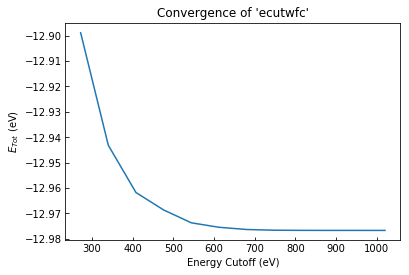

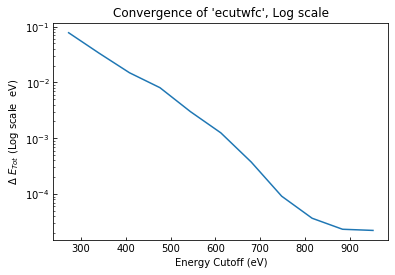

In [84]:
import pandas as pd #importar libreria para trabajar con data frames. 
import numpy as np #importar librería para trabajar vectores y matrices. Su objeto mas importante es el Array
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

A=!grep "!    total energy " HECutConvTest/*.out 
B = pd.Series(A)

C=pd.DataFrame(A)
n=0
Bfilas=B.size
#B[1][31:33]
D=np.zeros((Bfilas,3))
#D[12,0]=float(B[12][31:33])
while n<Bfilas:
    D[n,0]=float(B[n][31:33])*13.605698066
    D[n,1]=float(B[n][76:87])*13.605698066
    n=n+1


plt.plot(D[0:12,0],D[0:12,1])
plt.xlabel("Energy Cutoff (eV)")
plt.ylabel('$E_{Tot}$ (eV)')
plt.title("Convergence of 'ecutwfc'")
plt.tick_params(axis='both',direction='in')
plt.show()

plt.plot(D[0:11,0],D[0:11,1]-D[-1,1])
plt.yscale('log')
plt.xlabel("Energy Cutoff (eV)")
plt.ylabel('$\Delta$ $E_{Tot}$ (Log scale  eV)')
plt.title("Convergence of 'ecutwfc', Log scale")
plt.tick_params(axis='both',which='both',direction='in')
plt.show()

En las gráficas obtenidas se observa que una energía de corte de 400 eV es suficiente para que no exista un cambio en la energía total del sistema de mas de 10$^{-3}$ eV, brindando un parámetro de convergencia para el *ecutwfc*. 

Para sistemas cristalinos, en los que en realidad hay una repetición de la celda en $x$, $y$ y $z$, se optimiza también la variable "*k-points*", realizando una gráfica similar a la anterior, pero de energía total del sistema vs. número de *k-points*. Se debe elegir una malla lo suficientemente densa para que haga un mapeo del espacio recíproco.  

El siguiente notebook se realiza un ejercicio completo para calcular [la relajación geométrica de un cristal de silicio.](SiRelax.ipynb)

[Ir al notebook anterior.](QEFolder.ipynb)
